# H3 implement kmeans algorithm
## student ID:
## student Name:

In [2]:
import numpy as np
from IPython.display import clear_output
import os
import matplotlib.pyplot as plt

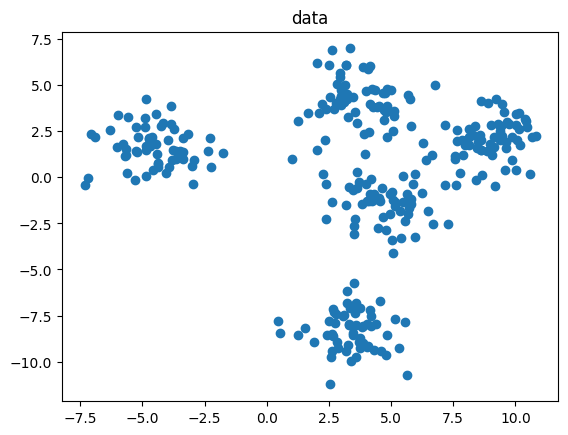

In [3]:
X = np.load("D:/X.npy")

plt.figure()
plt.scatter(X[0,:],X[1,:])
plt.title("data")

plt.savefig("data.png")

In [4]:
def distance(x1, x2):
     # 设置了一个距离函数
    return np.sqrt(np.sum((x1-x2)**2))

def kmeans(X, K=8, max_iterations=100):
    # X是一个向量组，将它们分为8个类，进行100次迭代
    if not os.path.exists("kmeans-k{}".format(K)):
        os.mkdir("kmeans-k{}".format(K))
    plt.figure()
    
    # 
    # step 1 init cluster centers
    x_idxs = np.random.permutation(X.shape[1])  # np.random.permutation()方法是一个随机排列的方法，当参数为n时，它就会生成一个0到n-1的随机排列，并以一个一维数组的形式返回
    u = X[:, x_idxs[:K]]    # 这是一个slice(切片)的写法
    # 让我们迭代地去理解这一行代码
    # 1.u = X[:], X是一个向量组，里面有很多的列向量，X[:]是X的一个切片，但由于X是被从头到尾切的，所以X[:]相当于X的一个副本
    # 2.x_idxs[:K],正如图中所示，我们有很多个点，这些点的数量是明显大于K的，那么x_idxs中元素的个数是大于K的，既然我们想要初始化一下类中心，那么我们只需要切[0:K]就可以了
    # 3.现在我们把第一步和第二步合在一起，用语言表述出来就是，在1~n个数中随机取8个数，然后在X这个向量组组中把这8个数对应下标的向量取出来组成一个新的向量组
    # 而这个新的向量组就是我们的每个向量就是我们每个类对应的类中心


    # init all samples x into first cluster
    # y是一个X.shape[1]行，1列的0阵
    y = np.zeros((X.shape[1],)) # 这一行说明每个点对应一个列向量

    for iter_idx in range(1, max_iterations+1):
        
        # D_ik denotes the distance between x_i and u_k  D_ik表示x_i和u_k之间的距离，u_k是第K个类的中心
        D = np.zeros((X.shape[1], K))   # D是一个X.shape[1]行，K列的一个零阵，X.shape[1]表示有多少个x_i(因为图像上的每一个点，都代表着一个列向量)
        # 那么在第i行上，第k个元素则代表x_i到第k个类中心的距离

        
        for i in range(X.shape[1]):
            # 遍历每一个类

            ####### start Your code here ########
            #####################################
            # step 2
            for k in range(K):
                # 遍历每一个类

                # rewrite the following line to calculate the distance between x_i and u_k
                # 开始计算第i个向量，到第k个类中心的距离
                d_ik = distance(X.T[i], u.T[k])  # 由于在python中下标是行优先的，X[i]取的是第i行，想要对列向量进行处理，就需要先把矩阵转置，然后再取行标
                # then store d_ik into D
                D[i, k] = d_ik
                D[i,k] = D[i,k]
                pass
            
            # rewrite the following line to classify the 𝑥_𝑖 to its nearest cluster c_𝑘 
            # y^{i} = argmin_{k}{d_{ik} | k = 1,2,...K}
            # remeber that the i-th line of matrix D is the distances of x^{i} to each cluster center
            i_k = int(0)
            for k in range(K):
                if D[i, k] < D[i, i_k]:
                    i_k = k

            y[i] = i_k
            #y[i] = y[i]
            
            ####### end Your code  ############
            ###################################
        
        # step 3
        u_t = u.T   #要将迭代的u写入u中只能先对u进行转置(受到行优先这个规则的限制)
        for k in range(K):
            ####### start Your code here ########
            #####################################
            
            # Calculate the mean of the samples 𝑥 \in 𝑐_𝑘 as new 𝜇_𝑘 
            # remeber that the cluster information of x are stored in y
            temp_vector = np.zeros(X.shape[0])
            vector_belong_k = 0
            for i in range(X.shape[1]):
                if y[i] == k:
                    temp_vector = temp_vector + X.T[i]
                    vector_belong_k += 1
                u_t[k] = temp_vector/int(vector_belong_k) 
            #u[:,k] =  u[:,k]
            ####### end Your code  ############
            ###################################
        u = u_t.T
        ## plot figures
        clear_output(wait=True)
        plt.scatter(X[0,:],X[1,:], c=y, s=8)
        plt.title("kmeans clustering at iter={}".format(iter_idx))
        
        #plot cluster centers
        plt.scatter(u[0,:],u[1,:], c=range(K), s=K, marker='o', linewidths=6)
        for k in range(K):
            plt.text(u[0,k], u[1,k], "u_{}".format(k),)
        
        plt.savefig("kmeans-k{}/iter={}.png".format(K, iter_idx))
        plt.show()
        
    return y

KeyboardInterrupt: 

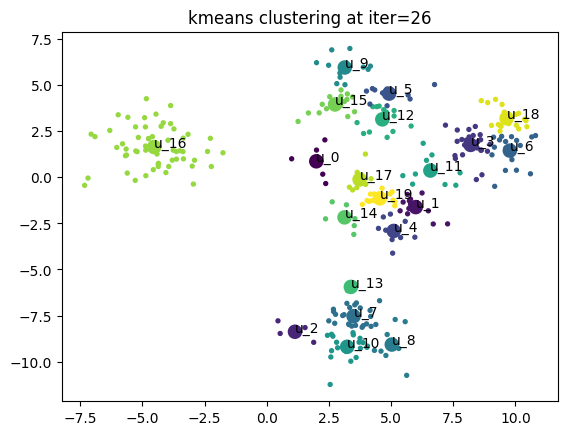

In [8]:
y = kmeans(X, K=20, max_iterations=100)